In [24]:
################ tunable parameters

input_file1='default.rules.csv'
input_file1='borderline1.rules.csv'

output_file1='output-2.rules.csv'
output_file1='output-borderline1.rules.csv'

unit1=400#1500#600#1500#800#900#400#200#100#50#1000#256#128
##wt=1800##3000#2400#1800#1500#1200#900#700
w2=2*unit1#400#200#100#50#1000#256#128#16#25
h2=30#w2#16
maxtime=4*unit1
halftime=maxtime//2
##niter =wt#600#500#400#300#6##1000#500###800 # #1500
step1=12 #4 #20 #8 #15 #5 #1 #37 #2
#step2=120#12#60 #120 #1


tag1 time_s time11 pop_s population ratio_s PPratio space_s w2 h2 w h rule_s rulespace rulestr


<IPython.core.display.Javascript object>


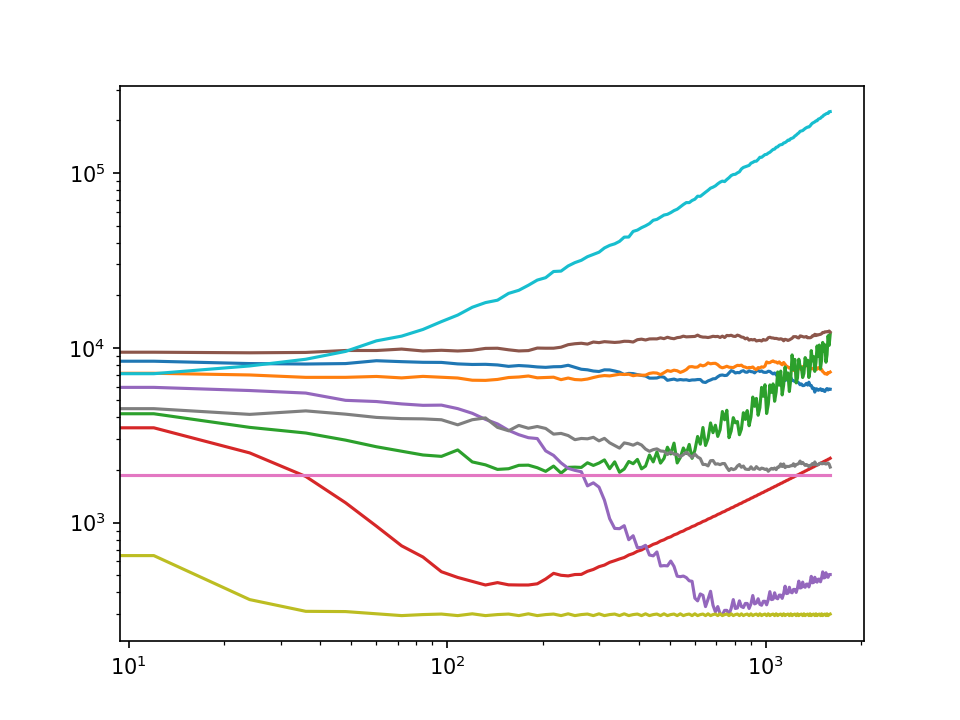

soup time 1600 pop 5802 ratio 0.8 space 800 30 831 113 rule lifelib b378s01356 #Long-lived, but still stable
soup time 1600 pop 7272 ratio 0.9 space 800 30 859 277 rule lifelib b368s12578 #Marginally explosive; contains a linear replicator
soup time 1600 pop 11986 ratio 3.0 space 800 30 857 683 rule lifelib b3-q4z5ys234k5j #Quickly settles, but explodes if there is a quadratic replicator
soup time 1600 pop 2336 ratio 1.9 space 800 30 1605 2442 rule lifelib b01346s023 #Has approximately 0.0343 linear growth patterns per soup
soup time 1600 pop 505 ratio 1.4 space 800 30 1791 1179 rule lifelib b34a6ns2aek3-a4a #A rare example of an apgsearchable rule with a (relatively common) zz_QUADRATIC; also has a common gun
soup time 1600 pop 12311 ratio 1.1 space 800 30 832 111 rule lifelib b357s1358 #Explodes at very large soup sizes, but smaller soups always die down
soup time 1600 pop 1870 ratio 1.0 space 800 30 801 36 rule lifelib b3aeijs01c2n3ack4q5a6e #Has a common O(sqrt(t)) growth pattern
s

In [26]:
from __future__ import print_function
#program version 303

%matplotlib notebook
##%matplotlib inline
from matplotlib import pyplot as plt

import math
import lifelib

#schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr'
schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr'
print(schema1.replace(',',' '))


###################

plt.figure()

##plt.yscale('log')
plt.loglog()

plt.ion()
##plt.ioff()

###################

with open(input_file1) as f0:
    input1=f0.read()

sp0=input1.splitlines()

for sp01 in sp0:
    sp5=sp01.split()
    #print(sp5)
    i5=sp5.index('lifelib')
    rulestr=sp5[i5+1]
    #print(rulestr)
    space1=' '
    rest1=space1.join(sp5[i5+2:])
    #print(rest1)
    
#for dbs in range(-ndbs,ndbs+1):
##for dbs in range(-1,2):
##for dbmax in range(ndbmax):

    #bmin=bmin0#+dbs
    #bmax=bmax0+dbs
    #smin=smin0#+dbs
    #smax=smax0#+dbs

    #rulestr='b3s23'
    #rulestr='r2b7t12s7t10'  ## niter <2000 or too much memory ? RADEJI ZATIM NEDAVAT DO FORUM
    #rulestr='b{}s23'.format(bmax)
    ######rulestr='r1b3t{}s3t4'.format(bmax)
    ##rulestr='r2b7t12s7t10'.format(bmax)
    #rulestr='r{}b{}t{}s{}t{}'.format(r,bmin,bmax,smin,smax)
    
    #rulestr=lifelib.sanirule(rulestr)
    sess = lifelib.load_rules(rulestr)
    #sess = lifelib.load_rules('r2b7t12s7t10')
    #sess = lifelib.load_rules('r2b7t9s7t10')

    lt = sess.lifetree()

    p1=lt.pattern()
    p=0.3###08#02#05 #1#2#3#4#5 
    p1[0:h2, 0:w2] = p

    ################################


    pops = []
    gens = []
    hs=[]
    ws=[]
    ys=[]
    
    #####p1 = p1[niter]

    population_niter = None
    
    ##currgen = 0
    ##for _ in range(int(niter/step2)):
    for currgen in range(0,  maxtime, step1):
        
        p1=p1[step1]
        
        if currgen//step1 == halftime//step1:
            population=p1.population ;  population_niter = population


        pops.append(p1.population)
        gens.append(currgen)
        
        bb=p1.bounding_box
        h=1
        w=1
        if bb:
            h=bb[2]-bb[0]
            w=bb[3]-bb[1]
        hs.append(h)
        ws.append(w)
        #ys.append(p1.population/h)
        ys.append(p1.population/(1+currgen))
            
            
#     !free -m

    #######################################

    plt.plot(gens, pops)
    #plt.plot(gens, hs)
    ###plt.plot(gens, pops/hs)
#     plt.plot(gens, ys)
    plt.show()

    
    #######################################

#     bb=p1.bounding_box
#     print(bb)

#     h=1
#     w=1
#     if bb:
#         h=bb[2]-bb[0]
#         w=bb[3]-bb[1]

#     tag1='soup'
#     time_s='time'
#     time11=niter
#     pop_s='pop'
#     space_s='space'
#     rule_s='rule'
#     rulespace='lifelib'

    #print(tag1,time_s,time11,pop_s,population,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)

    #######################################

    #####p1 = p1[niter]

    #######################################

    bb=p1.bounding_box
    #print(bb)

    h=1
    w=1
    if bb:
        h=bb[2]-bb[0]
        w=bb[3]-bb[1]


    tag1='soup'
    time_s='time'
    time11=maxtime
    pop_s='pop'
    population=p1.population ;  population_2niter = population
    space_s='space'
    rule_s='rule'
    rulespace='lifelib'

    ratio_s='ratio'
    #fPPratio= population_2niter/population_niter
    fPPratio= population_2niter/(population_niter+1)
    PPratio= '{:.1f}'.format(fPPratio)
    #log2PP= '{:.1f}'.format(math.log2(fPPratio) )

    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,rest1)
    with open(output_file1,'a') as f1:
        #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, file=f1)
        print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,rest1, file=f1)

    
    #####################################
    del p1
    del lt
    del sess
    #!free -m

!free -m


In [25]:
math.exp(0.7*math.log(2))

1.624504792712471

In [1]:
!free -m
!top -b -n 1 | grep pyt

              total        used        free      shared  buff/cache   available
Mem:           4429        1138        2659          27         631        3015
Swap:           759          26         732
 6771 martin    20   0  624712  43524  13632 R  6,7  1,0   0:00.11 python3
  680 martin    20   0  618508  43328  13484 S  0,0  1,0   0:00.19 python3
 1858 martin    20   0  336356  63064  13640 S  0,0  1,4   1:05.50 jupyter-not+
29630 martin    20   0  618376  43104  13432 S  0,0  1,0   0:00.30 python3


In [35]:
#
import sys

try:
    sess = lifelib.load_rules('sffdsdfsfd')
    #1/0
except:
    exc_info1=sys.exc_info()
    #print("Unexpected error:", exc_info1[0])#, exc_info1[1])
    print("error:", exc_info1[0], exc_info1[1])
    #raise

Generating code for rules ['sffdsdfsfd']...
error: <class 'ValueError'> Rule "sffdsdfsfd" does not belong to any genus
